# **Import Thư viện**

In [ ]:
from keras.utils import to_categorical
import tensorflow as tf
import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import seaborn as sns
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import*
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import tensorflow_hub as tfHub
from tensorflow.keras import layers as tfLayers
from keras import models
from keras.models import Model
from keras import layers
import cv2
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import adam

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
'''!pip install kaggle
! mkdir ~/.kaggle
!cp './kaggle.json' '/root/.kaggle/'
!kaggle datasets download --force -d 'paultimothymooney/chest-xray-pneumonia'
!rm '/root/.kaggle/kaggle.json'
!unzip '/content/chest-xray-pneumonia.zip' -d 'my_data''''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/datanew/chest-xray-pneumonia.zip' -d 'my_data'

Streaming output truncated to the last 5000 lines.
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0655-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0656-0001-0002.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0656-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0657-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0658-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0659-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0660-0001-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0660-0001-0002.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0660-0001.jpeg  
  inflating: my_data/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-

# **Visuallize img**

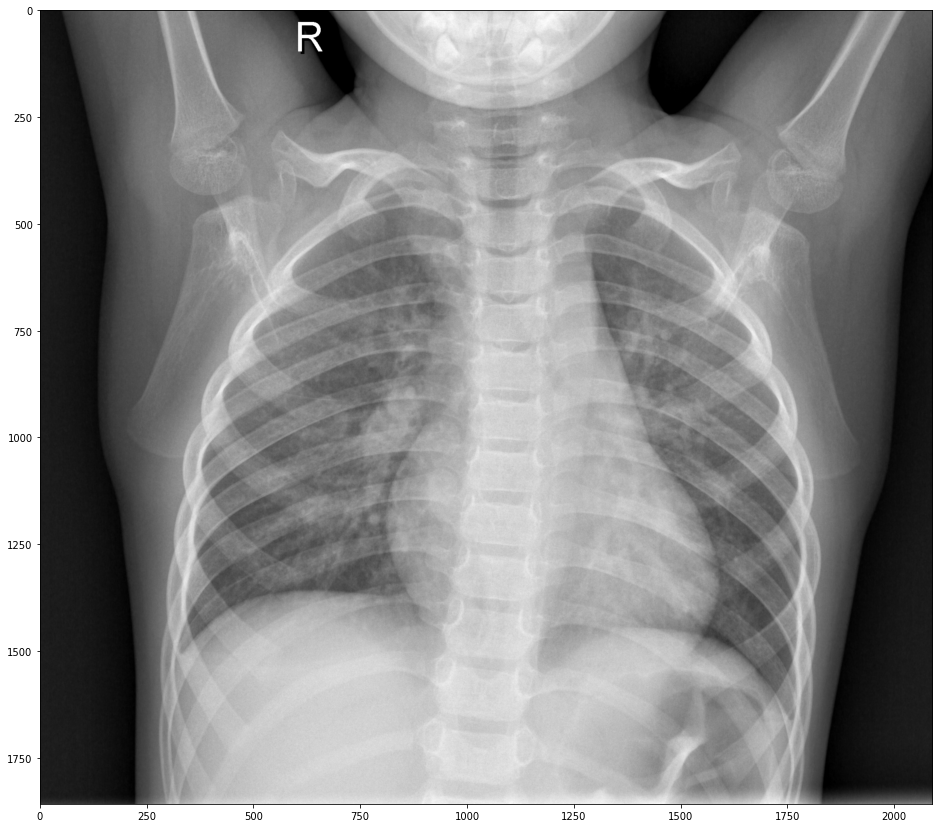

In [ ]:
from matplotlib import image
image_path ='/content/my_data/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
image = cv2.imread(image_path)
plt.figure(figsize=(16,16))
plt.imshow(image)

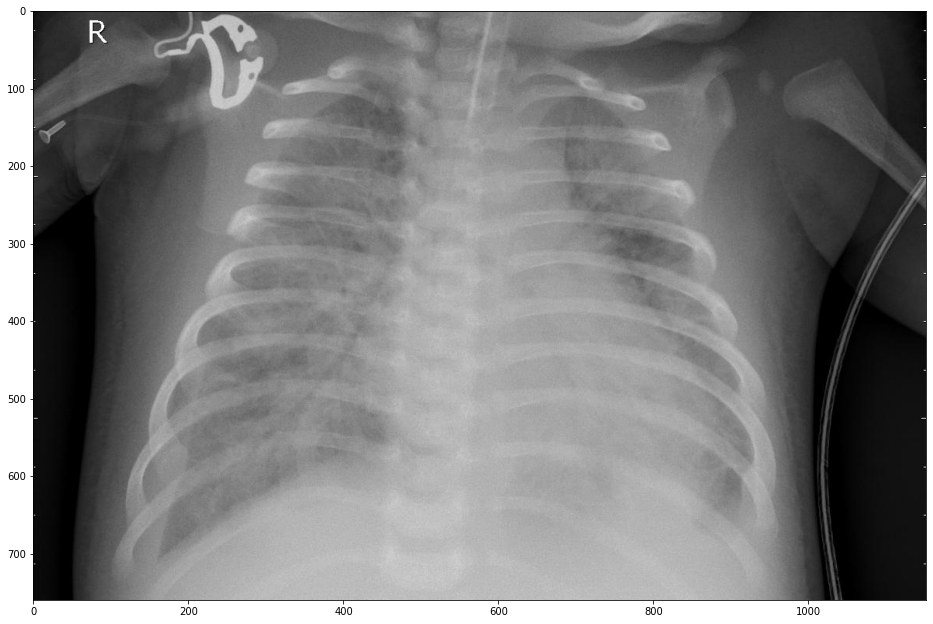

In [ ]:
image_path ='/content/my_data/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'
image = cv2.imread(image_path)
plt.figure(figsize=(16,16))
plt.imshow(image)

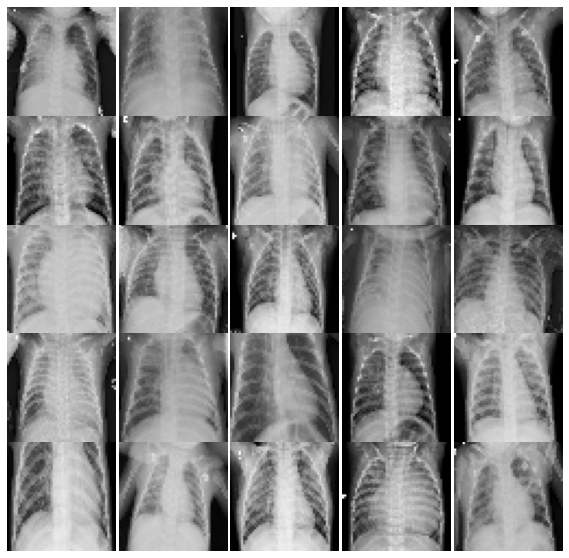

In [ ]:
from glob import glob
train_path='/content/my_data/chest_xray/train'
path_name = train_path + '/**/*.jpeg'
imagePatches = glob(path_name, recursive=True)
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# **load train set, test set, validation set**

In [ ]:
#View data
import os
train_PNEUMONIA=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/train/PNEUMONIA')
train_NORMAL=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/train/NORMAL')
test_PNEUMONIA=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/test/PNEUMONIA')
test_NORMAL=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/test/NORMAL')
val_PNEUMONIA=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/val/PNEUMONIA')
val_NORMAL=os.listdir('/content/my_data/chest-xray-pneumonia/chest_xray/val/NORMAL')
n_train=len(train_PNEUMONIA)+len(train_NORMAL)
n_test=len(test_PNEUMONIA)+len(test_NORMAL)
n_val=len(val_PNEUMONIA)+len(val_NORMAL)
print('So anh tap train: ',n_train, ' PNEUMONIA: ',len(train_PNEUMONIA),' NORMAL: ',len(train_NORMAL))
print('So anh tap test: ',n_test, '   PNEUMONIA: ',len(test_PNEUMONIA),'  NORMAL: ',len(test_NORMAL))
print('So anh tap val: ',n_val, '     PNEUMONIA: ',len(val_PNEUMONIA),'   NORMAL: ',len(val_NORMAL))

So anh tap train:  4186  PNEUMONIA:  3106  NORMAL:  1080
So anh tap test:  624    PNEUMONIA:  390   NORMAL:  234
So anh tap val:  1046      PNEUMONIA:  777    NORMAL:  269


In [ ]:
#tập test dataset
X_test = []
y_test = []

for i,file_name in enumerate(test_PNEUMONIA):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/test/PNEUMONIA',file_name)    
  img=load_img(path, target_size=(299, 299))
  
  img = img_to_array(img)
  img=img/255.0
  X_test.append(img)
  y_test.append(1)
for i,file_name in enumerate(test_NORMAL):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/test/NORMAL',file_name)      
  img=load_img(path, target_size=(299, 299))
  
  img = img_to_array(img)
  img=img/255.0
  X_test.append(img)
  y_test.append(0)

In [ ]:
#tập val dataset
X_val = []
y_val = []

for i,file_name in enumerate(val_PNEUMONIA):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/val/PNEUMONIA',file_name)      
  img=load_img(path, target_size=(299, 299))

  img = img_to_array(img)
  img=img/255.0
  X_val.append(img)
  y_val.append(1)
for i,file_name in enumerate(val_NORMAL):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/val/NORMAL',file_name)      
  img=load_img(path, target_size=(299, 299))
  
  img = img_to_array(img)
  img=img/255.0
  X_val.append(img)
  y_val.append(0)

In [ ]:
#tập train dataset
X_train = []
y_train = []

for i,file_name in enumerate(train_PNEUMONIA):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/train/PNEUMONIA',file_name)  
  img=load_img(path, target_size=(299, 299))

  img = img_to_array(img)
  img=img/255.0
  X_train.append(img)
  y_train.append(1)

for i,file_name in enumerate(train_NORMAL):
  path=os.path.join('/content/my_data/chest-xray-pneumonia/chest_xray/train/NORMAL',file_name)     
  img=load_img(path, target_size=(299, 299))

  img = img_to_array(img)
  img=img/255.0
  X_train.append(img)
  y_train.append(0)

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **FINE TUNING KO TĂNG CƯỜNG DATA**

Theo tập val, test, train của người ta

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')

for layer in base_model.layers[:172]:
    layer.trainable = False

#base_model.summary()

87916544/87910968 [==============================] - 8s 0us/step


In [ ]:

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
model.compile(optimizer=adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
history = model.fit(X_train,y_train ,
          batch_size=32,
          epochs=50,
          verbose=1,
          validation_data=(X_val,y_val)
          
          )

Train on 4186 samples, validate on 1046 samples
Epoch 1/15
4186/4186 [==============================] - 132s 32ms/step - loss: 0.1966 - acc: 0.9391 - val_loss: 0.2633 - val_acc: 0.8757
Epoch 2/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0485 - acc: 0.9883 - val_loss: 0.5128 - val_acc: 0.7964
Epoch 3/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0213 - acc: 0.9976 - val_loss: 0.7614 - val_acc: 0.7486
Epoch 4/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0225 - acc: 0.9959 - val_loss: 0.5051 - val_acc: 0.7811
Epoch 5/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0147 - acc: 0.9974 - val_loss: 0.5798 - val_acc: 0.7667
Epoch 6/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0135 - acc: 0.9974 - val_loss: 0.6040 - val_acc: 0.7686
Epoch 7/15
4186/4186 [==============================] - 108s 26ms/step - loss: 0.0207 - acc: 0.9945 - val_loss: 0.6971 - val_acc: 

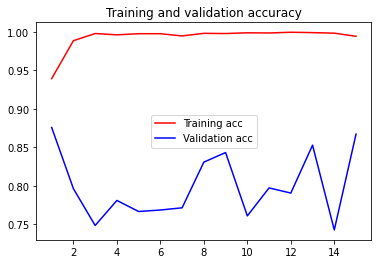

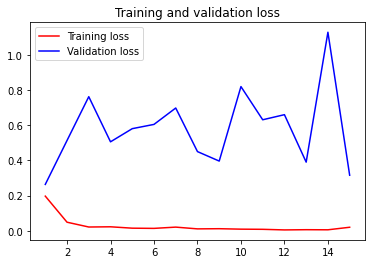

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report((y_test), np.argmax(preds,axis=-1)))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       234
           1       0.66      1.00      0.79       390

    accuracy                           0.67       624
   macro avg       0.83      0.56      0.51       624
weighted avg       0.79      0.67      0.58       624



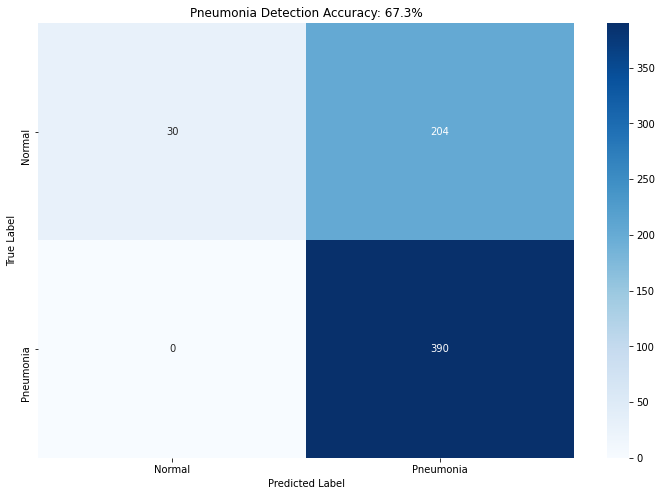

In [ ]:
classes = ['Normal', 'Pneumonia']
acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
specificity=(TN / float(TN + FP))*100
sensitivity=(TP / float(TP + FN))*100
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Pneumonia Detection Accuracy: {0:.1f}%'.format(acc))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
_,acc  = model.evaluate(X_test,y_test )

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision:',precision)
print('recall',recall)
print('f1',f1)
print('specificity',specificity)
print('sensitivity',sensitivity)
print('acc',acc)

624/624 [==============================] - 8s 13ms/step
precision: 0.6565656565656566
recall 1.0
f1 0.7926829268292683
specificity 12.82051282051282
sensitivity 100.0
acc 0.6730769276618958


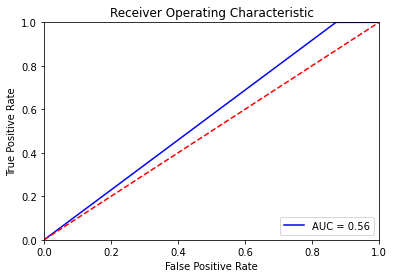

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, np.argmax(preds,axis=-1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **FINE TUNING +TĂNG CƯỜNG DATA**

Theo tập val, test, train của người ta

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
aug_train = ImageDataGenerator(
        #rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        fill_mode='nearest'

)
#For the data augmentation, i choosed to :

#Randomly rotate some training images by 30 degrees

#Randomly Zoom by 20% some training images

#Randomly shift images horizontally by 10% of the width

#Randomly shift images vertically by 10% of the height Once our model is ready, we fit the training dataset.
# Note that the validation data should not be augmented!
#aug_val = ImageDataGenerator(rescale=1./255)
#aug_test = ImageDataGenerator(rescale=1./255)


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

for layer in base_model.layers[:172]:
    layer.trainable = False

#base_model.summary()

In [ ]:

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:

history = model.fit_generator(
    aug_train.flow(X_train,y_train,batch_size=32),   
    epochs=15,
    verbose=1,  
    validation_data=(X_val,y_val)
)

Epoch 1/15
131/131 [==============================] - 119s 907ms/step - loss: 0.3518 - acc: 0.8837 - val_loss: 0.2089 - val_acc: 0.9302
Epoch 2/15
131/131 [==============================] - 106s 811ms/step - loss: 0.1607 - acc: 0.9515 - val_loss: 0.2038 - val_acc: 0.9092
Epoch 3/15
131/131 [==============================] - 106s 812ms/step - loss: 0.1380 - acc: 0.9611 - val_loss: 0.2234 - val_acc: 0.9101
Epoch 4/15
131/131 [==============================] - 106s 812ms/step - loss: 0.1054 - acc: 0.9689 - val_loss: 0.1963 - val_acc: 0.9207
Epoch 5/15
131/131 [==============================] - 106s 812ms/step - loss: 0.0860 - acc: 0.9744 - val_loss: 0.1840 - val_acc: 0.9302
Epoch 6/15
131/131 [==============================] - 106s 811ms/step - loss: 0.0905 - acc: 0.9711 - val_loss: 0.1861 - val_acc: 0.9207
Epoch 7/15
131/131 [==============================] - 106s 811ms/step - loss: 0.0745 - acc: 0.9737 - val_loss: 0.2049 - val_acc: 0.9407
Epoch 8/15
131/131 [============================

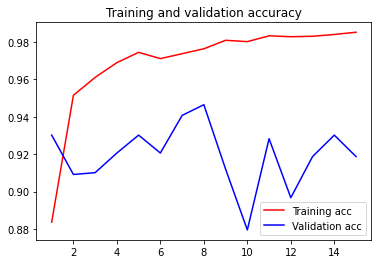

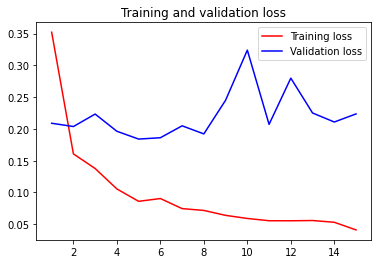

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report((y_test), np.argmax(preds,axis=-1)))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       234
           1       0.91      0.95      0.93       390

    accuracy                           0.91       624
   macro avg       0.91      0.90      0.90       624
weighted avg       0.91      0.91      0.91       624



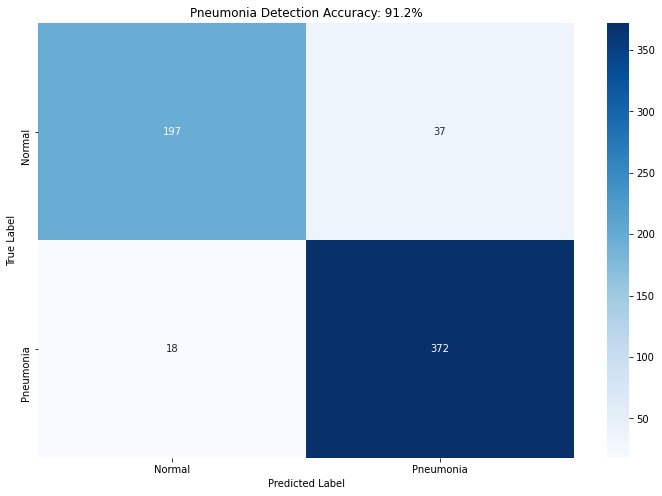

In [ ]:

classes = ['Normal', 'Pneumonia']
acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
specificity=(TN / float(TN + FP))*100
sensitivity=(TP / float(TP + FN))*100
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Pneumonia Detection Accuracy: {0:.1f}%'.format(acc))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
_,acc  = model.evaluate(X_test,y_test )
auc=roc_auc_score(y_test,np.argmax(preds,axis=-1))

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision: ',precision)
print('recall:    ',recall)
print('f1:        ',f1)
print('specificity:',specificity)
print('sensitivity:',sensitivity)
print('acc:        ',acc)
print('auc:        ',auc)

624/624 [==============================] - 8s 13ms/step
precision:  0.9095354523227384
recall:     0.9538461538461539
f1:         0.9311639549436795
specificity: 84.1880341880342
sensitivity: 95.38461538461539
acc:         0.9118589758872986
auc:         0.897863247863248


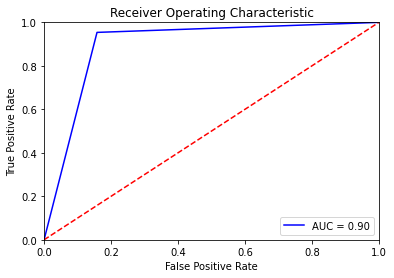

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, np.argmax(preds,axis=-1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **fine tuning +tăng cường+ giảm lr**

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

for layer in base_model.layers[:172]:
    layer.trainable = False

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit_generator(
    aug_train.flow(X_train,y_train,batch_size=32),   
    epochs=25,
    verbose=1,  
    validation_data=(X_val,y_val)
)


Epoch 1/25
131/131 [==============================] - 113s 866ms/step - loss: 0.5752 - acc: 0.7585 - val_loss: 0.3291 - val_acc: 0.8786
Epoch 2/25
131/131 [==============================] - 101s 771ms/step - loss: 0.3949 - acc: 0.8564 - val_loss: 0.3404 - val_acc: 0.8815
Epoch 3/25
131/131 [==============================] - 101s 773ms/step - loss: 0.2790 - acc: 0.9083 - val_loss: 0.3232 - val_acc: 0.8910
Epoch 4/25
131/131 [==============================] - 101s 772ms/step - loss: 0.2239 - acc: 0.9365 - val_loss: 0.3033 - val_acc: 0.8690
Epoch 5/25
131/131 [==============================] - 101s 773ms/step - loss: 0.2076 - acc: 0.9431 - val_loss: 0.3012 - val_acc: 0.8652
Epoch 6/25
131/131 [==============================] - 101s 773ms/step - loss: 0.1784 - acc: 0.9460 - val_loss: 0.2984 - val_acc: 0.8738
Epoch 7/25
131/131 [==============================] - 101s 774ms/step - loss: 0.1688 - acc: 0.9546 - val_loss: 0.2963 - val_acc: 0.8958
Epoch 8/25
131/131 [============================

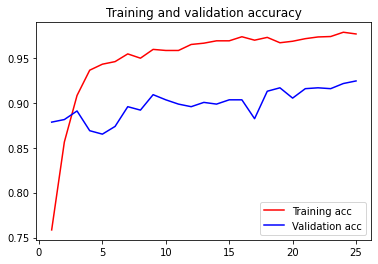

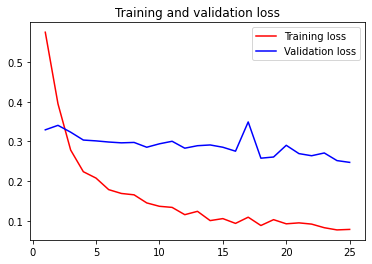

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

              precision    recall  f1-score   support

           0       0.87      0.68      0.76       234
           1       0.83      0.94      0.88       390

    accuracy                           0.84       624
   macro avg       0.85      0.81      0.82       624
weighted avg       0.84      0.84      0.83       624



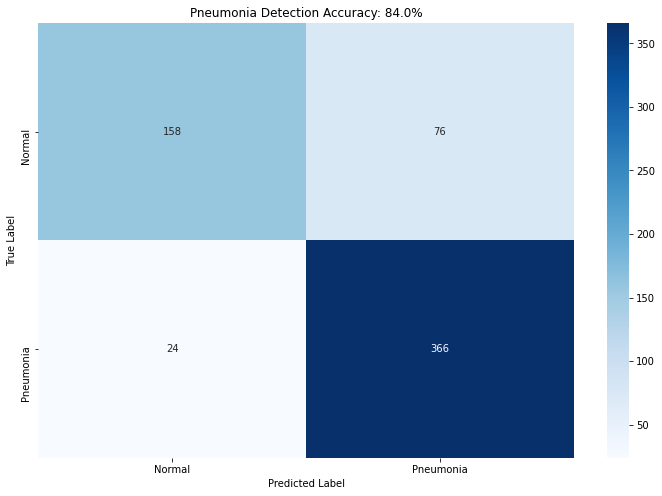

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report((y_test), np.argmax(preds,axis=-1)))

classes = ['Normal', 'Pneumonia']
acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
specificity=(TN / float(TN + FP))*100
sensitivity=(TP / float(TP + FN))*100
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Pneumonia Detection Accuracy: {0:.1f}%'.format(acc))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
_,acc  = model.evaluate(X_test,y_test )
auc=roc_auc_score(y_test,np.argmax(preds,axis=-1))

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision: ',precision)
print('recall:    ',recall)
print('f1:        ',f1)
print('specificity:',specificity)
print('sensitivity:',sensitivity)
print('acc:        ',acc)
print('auc:        ',auc)

624/624 [==============================] - 8s 13ms/step
precision:  0.8280542986425339
recall:     0.9384615384615385
f1:         0.8798076923076923
specificity: 67.52136752136752
sensitivity: 93.84615384615384
acc:         0.8397436141967773
auc:         0.8068376068376069


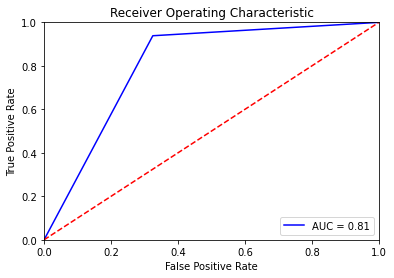

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, np.argmax(preds,axis=-1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

for layer in base_model.layers[:172]:
    layer.trainable = False

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit_generator(
    aug_train.flow(X_train,y_train,batch_size=32),   
    epochs=35,
    verbose=1,  
    validation_data=(X_val,y_val)
)


Epoch 1/35
131/131 [==============================] - 114s 867ms/step - loss: 0.5912 - acc: 0.7688 - val_loss: 0.3583 - val_acc: 0.8566
Epoch 2/35
131/131 [==============================] - 102s 776ms/step - loss: 0.3824 - acc: 0.8700 - val_loss: 0.3000 - val_acc: 0.8671
Epoch 3/35
131/131 [==============================] - 102s 776ms/step - loss: 0.2788 - acc: 0.9121 - val_loss: 0.3487 - val_acc: 0.8499
Epoch 4/35
131/131 [==============================] - 102s 777ms/step - loss: 0.2428 - acc: 0.9281 - val_loss: 0.3160 - val_acc: 0.8585
Epoch 5/35
131/131 [==============================] - 102s 777ms/step - loss: 0.1974 - acc: 0.9453 - val_loss: 0.2468 - val_acc: 0.8929
Epoch 6/35
131/131 [==============================] - 102s 777ms/step - loss: 0.1888 - acc: 0.9489 - val_loss: 0.2360 - val_acc: 0.9063
Epoch 7/35
131/131 [==============================] - 102s 776ms/step - loss: 0.1682 - acc: 0.9532 - val_loss: 0.2488 - val_acc: 0.8958
Epoch 8/35
131/131 [============================

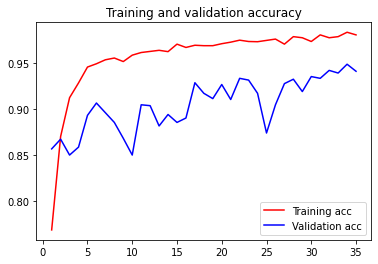

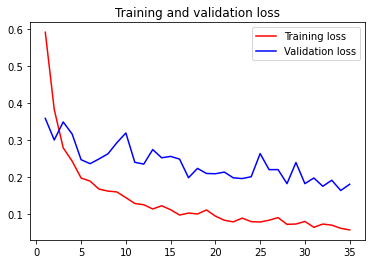

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
_,acc  = model.evaluate(X_test,y_test )
auc=roc_auc_score(y_test,np.argmax(preds,axis=-1))

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision: ',precision)
print('recall:    ',recall)
print('f1:        ',f1)
print('specificity:',specificity)
print('sensitivity:',sensitivity)
print('acc:        ',acc)
print('auc:        ',auc)

624/624 [==============================] - 8s 13ms/step
precision:  0.8280542986425339
recall:     0.9384615384615385
f1:         0.8798076923076923
specificity: 67.52136752136752
sensitivity: 93.84615384615384
acc:         0.8525640964508057
auc:         0.8068376068376069


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

for layer in base_model.layers[:172]:
    layer.trainable = False

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit_generator(
    aug_train.flow(X_train,y_train,batch_size=32),   
    epochs=50,
    verbose=1,  
    validation_data=(X_val,y_val)
)

Epoch 1/50
131/131 [==============================] - 113s 864ms/step - loss: 0.6066 - acc: 0.7532 - val_loss: 0.3308 - val_acc: 0.8576
Epoch 2/50
131/131 [==============================] - 101s 774ms/step - loss: 0.3869 - acc: 0.8636 - val_loss: 0.3146 - val_acc: 0.8815
Epoch 3/50
131/131 [==============================] - 101s 772ms/step - loss: 0.3102 - acc: 0.9061 - val_loss: 0.3538 - val_acc: 0.8623
Epoch 4/50
131/131 [==============================] - 101s 774ms/step - loss: 0.2496 - acc: 0.9257 - val_loss: 0.3044 - val_acc: 0.8795
Epoch 5/50
131/131 [==============================] - 101s 774ms/step - loss: 0.2104 - acc: 0.9408 - val_loss: 0.3875 - val_acc: 0.8413
Epoch 6/50
131/131 [==============================] - 101s 773ms/step - loss: 0.1939 - acc: 0.9400 - val_loss: 0.3064 - val_acc: 0.8767
Epoch 7/50
131/131 [==============================] - 101s 773ms/step - loss: 0.1845 - acc: 0.9467 - val_loss: 0.3175 - val_acc: 0.8623
Epoch 8/50
131/131 [============================

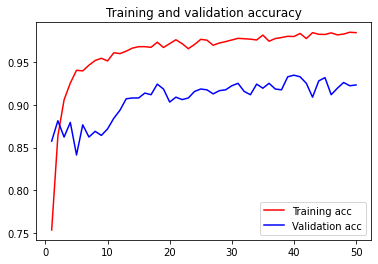

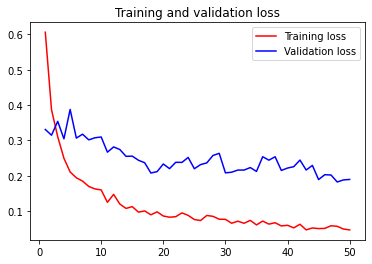

624/624 [==============================] - 8s 12ms/step
precision:  0.8280542986425339
recall:     0.9384615384615385
f1:         0.8798076923076923
specificity: 67.52136752136752
sensitivity: 93.84615384615384
acc:         0.8108974099159241
auc:         0.8068376068376069


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()
import numpy as np
from sklearn.metrics import roc_auc_score
_,acc  = model.evaluate(X_test,y_test )
auc=roc_auc_score(y_test,np.argmax(preds,axis=-1))

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision: ',precision)
print('recall:    ',recall)
print('f1:        ',f1)
print('specificity:',specificity)
print('sensitivity:',sensitivity)
print('acc:        ',acc)
print('auc:        ',auc)

              precision    recall  f1-score   support

           0       0.96      0.52      0.67       234
           1       0.77      0.99      0.87       390

    accuracy                           0.81       624
   macro avg       0.87      0.75      0.77       624
weighted avg       0.84      0.81      0.79       624



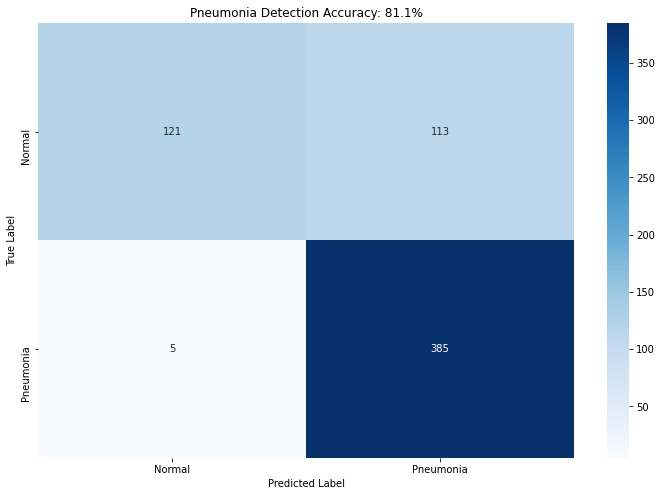

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report((y_test), np.argmax(preds,axis=-1)))

classes = ['Normal', 'Pneumonia']
acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
specificity=(TN / float(TN + FP))*100
sensitivity=(TP / float(TP + FN))*100
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Pneumonia Detection Accuracy: {0:.1f}%'.format(acc))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

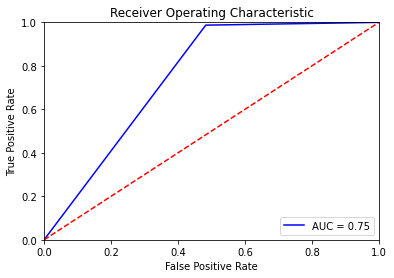

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, np.argmax(preds,axis=-1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

70 epoch

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten,BatchNormalization

base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

for layer in base_model.layers[:172]:
    layer.trainable = False

x = base_model.output
x=Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

#a=adam(lr=0.0001)
model.compile(optimizer=adam(lr=0.00001),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit_generator(
    aug_train.flow(X_train,y_train,batch_size=32),   
    epochs=70,
    verbose=1,  
    validation_data=(X_val,y_val)
)

Epoch 1/70
131/131 [==============================] - 121s 923ms/step - loss: 0.5916 - acc: 0.7721 - val_loss: 0.4092 - val_acc: 0.8375
Epoch 2/70
131/131 [==============================] - 108s 824ms/step - loss: 0.3913 - acc: 0.8624 - val_loss: 0.3874 - val_acc: 0.8556
Epoch 3/70
131/131 [==============================] - 108s 824ms/step - loss: 0.2952 - acc: 0.9080 - val_loss: 0.3576 - val_acc: 0.8748
Epoch 4/70
131/131 [==============================] - 108s 825ms/step - loss: 0.2493 - acc: 0.9293 - val_loss: 0.3436 - val_acc: 0.8834
Epoch 5/70
131/131 [==============================] - 108s 824ms/step - loss: 0.2299 - acc: 0.9360 - val_loss: 0.3354 - val_acc: 0.8681
Epoch 6/70
131/131 [==============================] - 108s 823ms/step - loss: 0.2012 - acc: 0.9446 - val_loss: 0.3400 - val_acc: 0.8853
Epoch 7/70
131/131 [==============================] - 108s 823ms/step - loss: 0.1793 - acc: 0.9470 - val_loss: 0.3527 - val_acc: 0.8470
Epoch 8/70
131/131 [============================

              precision    recall  f1-score   support

           0       0.90      0.68      0.77       234
           1       0.83      0.95      0.89       390

    accuracy                           0.85       624
   macro avg       0.86      0.81      0.83       624
weighted avg       0.86      0.85      0.84       624



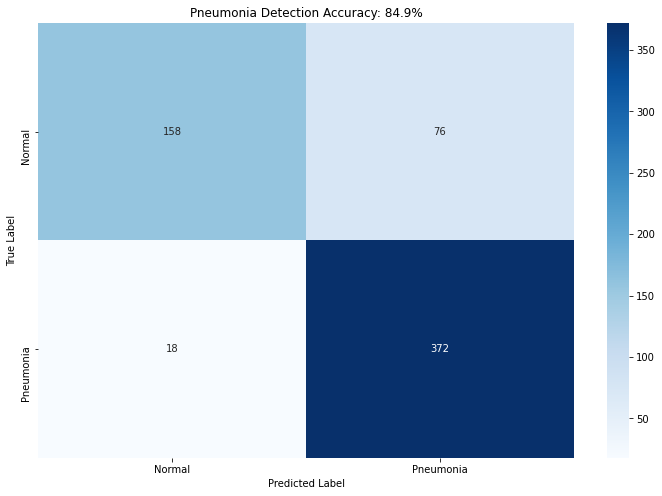

In [ ]:
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(classification_report((y_test), np.argmax(preds,axis=-1)))

classes = ['Normal', 'Pneumonia']
acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
TN, FP    = cm[0, 0], cm[0, 1]
FN, TP    = cm[1, 0], cm[1, 1]
specificity=(TN / float(TN + FP))*100
sensitivity=(TP / float(TP + FN))*100
plt.figure(figsize=(12,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Pneumonia Detection Accuracy: {0:.1f}%'.format(acc))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

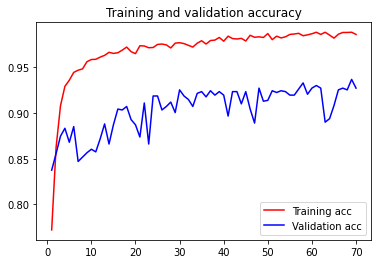

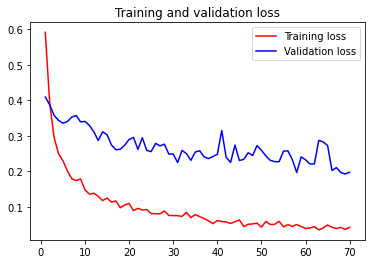

624/624 [==============================] - 8s 13ms/step
precision:  0.8303571428571429
recall:     0.9538461538461539
f1:         0.8878281622911695
specificity: 67.52136752136752
sensitivity: 95.38461538461539
acc:         0.8493589758872986
auc:         0.8145299145299147


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()
import numpy as np
from sklearn.metrics import roc_auc_score
_,acc  = model.evaluate(X_test,y_test )
auc=roc_auc_score(y_test,np.argmax(preds,axis=-1))

precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
print('precision: ',precision)
print('recall:    ',recall)
print('f1:        ',f1)
print('specificity:',specificity)
print('sensitivity:',sensitivity)
print('acc:        ',acc)
print('auc:        ',auc)

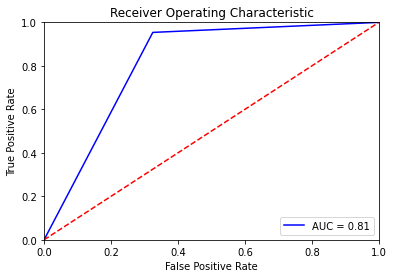

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, np.argmax(preds,axis=-1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **FINE TUNING +TĂNG CƯỜNG DATA +K-fold**
Sd K-fold chia lại train, val

In [ ]:
data_train_X=X_train+X_val
data_train_y=y_train+y_val

data_train_X=np.array(data_train_X)
data_train_y=np.array(data_train_y)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
aug_train = ImageDataGenerator(
        #rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        shear_range=0.2,
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True, # randomly flip images
        fill_mode='nearest'

)
#For the data augmentation, i choosed to :

#Randomly rotate some training images by 30 degrees

#Randomly Zoom by 20% some training images

#Randomly shift images horizontally by 10% of the width

#Randomly shift images vertically by 10% of the height Once our model is ready, we fit the training dataset.
# Note that the validation data should not be augmented!
#aug_val = ImageDataGenerator(rescale=1./255)
#aug_test = ImageDataGenerator(rescale=1./255)

In [ ]:
def get_model():
  base_model = InceptionV3(input_shape=(299,299,3),include_top=False,weights='imagenet')
#279 is number of mixed 9 layer
#248 is number of mixed 8 layer

  for layer in base_model.layers[:172]:
    layer.trainable = False
  x = base_model.output
  x=Flatten()(x)
  x = Dropout(0.4)(x)

  x = Dense(64, activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dense(2,activation='softmax')(x)

  model = Model(inputs=base_model.input, outputs=x)


  model.compile(optimizer=adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])
  return model

In [ ]:
from sklearn.model_selection import KFold
def evaluate_model(dataX, dataY,X_test,y_test ,n_folds=5):
  acc_list=[]
  precision_list=[]
  recall_list=[]
  f1_list=[]
  sensitivity_list=[]
  specificity_list=[]
  scores, histories = list(), list()
	# prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
		# define model
    model = get_model()
		# select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
    #history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    history = model.fit_generator(
    aug_train.flow(trainX,trainY,batch_size=32),   
    epochs=10,
    verbose=0,  
    validation_data=(testX, testY))

    histories.append(history)
		# evaluate model
    preds = model.predict(X_test)
    _,acc=model.evaluate(X_test,y_test, verbose=0)
    precision = precision_score(y_test, np.argmax(preds,axis=-1)) 
    recall = recall_score(y_test, np.argmax(preds,axis=-1)) 
    f1 = f1_score(y_test, np.argmax(preds,axis=-1)) 
    acc_list.append(acc)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    preds = model.predict(X_test)
    classification_report((y_test), np.argmax(preds,axis=-1))
    classes = ['Normal', 'Pneumonia']
    acc = accuracy_score(y_test, np.argmax(preds,axis=-1))*100.0
    cm = confusion_matrix(y_test, np.argmax(preds,axis=-1))
    TN, FP    = cm[0, 0], cm[0, 1]
    FN, TP    = cm[1, 0], cm[1, 1]
    specificity=(TN / float(TN + FP))*100
    sensitivity=(TP / float(TP + FN))*100
    specificity_list.append(specificity)
    sensitivity_list.append(sensitivity)
#evaluate in test set

  return histories,acc_list,precision_list,recall_list,f1_list,specificity_list,sensitivity_list

In [ ]:
histories,acc_list,precision_list,recall_list,f1_list,specificity_list,sensitivity_list=evaluate_model(data_train_X, data_train_y,X_test,y_test, n_folds=5)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
acc=(acc_list[0]+acc_list[1]+acc_list[2]+acc_list[3]+acc_list[4])/5
precision=(precision_list[0]+precision_list[1]+precision_list[2]+precision_list[3]+precision_list[4])/5
recall=(recall_list[0]+recall_list[1]+recall_list[2]+recall_list[3]+recall_list[4])/5
f1=(f1_list[0]+f1_list[1]+f1_list[2]+f1_list[3]+f1_list[4])/5
specificity=(specificity_list[0]+specificity_list[1]+specificity_list[2]+specificity_list[3]+specificity_list[4])/5
sensitivity=(sensitivity_list[0]+sensitivity_list[1]+sensitivity_list[2]+sensitivity_list[3]+sensitivity_list[4])/5
print('acc       ',acc)
print('precision ', precision)
print('recall    ' ,recall)
print('f1        ',f1)
print('specificity ',specificity)
print('sensitivity ',sensitivity)

acc        0.759294867515564
precision  0.725453741888062
recall     0.9933333333333334
f1         0.838110545552078
specificity  36.92307692307693
sensitivity  99.33333333333333


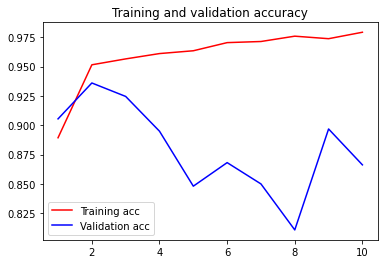

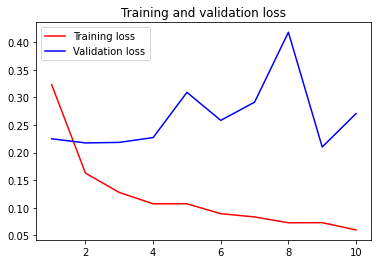

In [ ]:
acc = histories[0].history['acc']
val_acc = histories[0].history['val_acc']
loss = histories[0].history['loss']
val_loss = histories[0].history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

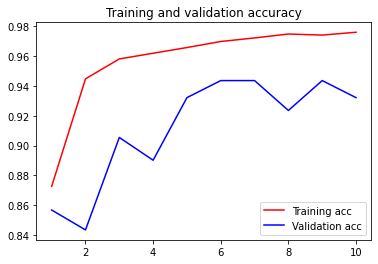

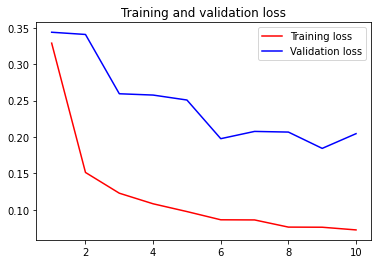

In [ ]:
acc = histories[1].history['acc']
val_acc = histories[1].history['val_acc']
loss = histories[1].history['loss']
val_loss = histories[1].history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

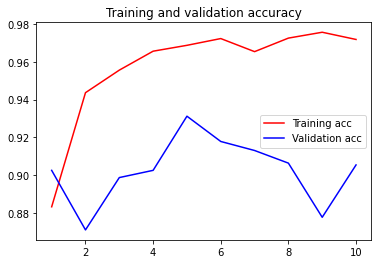

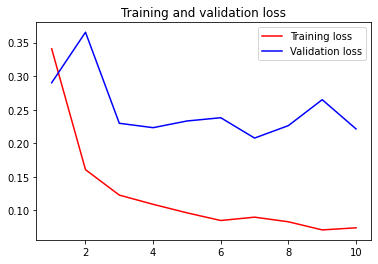

In [ ]:
acc = histories[2].history['acc']
val_acc = histories[2].history['val_acc']
loss = histories[2].history['loss']
val_loss = histories[2].history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

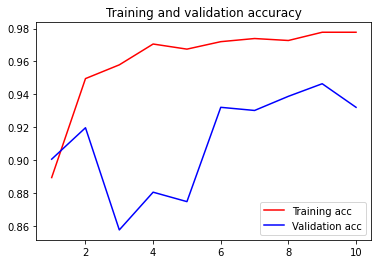

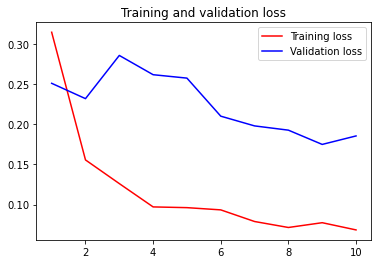

In [ ]:
acc = histories[3].history['acc']
val_acc = histories[3].history['val_acc']
loss = histories[3].history['loss']
val_loss = histories[3].history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

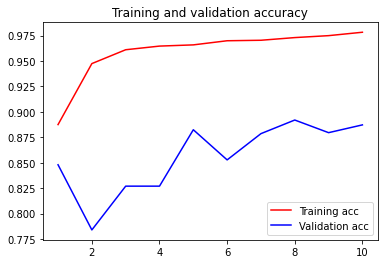

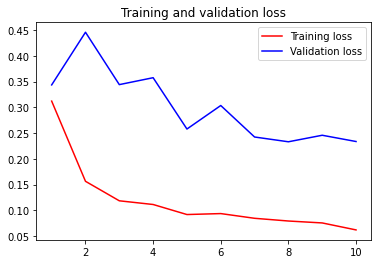

In [ ]:
acc = histories[4].history['acc']
val_acc = histories[4].history['val_acc']
loss = histories[4].history['loss']
val_loss = histories[4].history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()